In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [11]:
df=pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.shape

(344, 7)

#***3.DATA VISULAIZATION***

#1.UNIVARIATE ANALYSIS

<ipython-input-29-353dcc2dd5d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sex)


<Axes: xlabel='sex', ylabel='Density'>

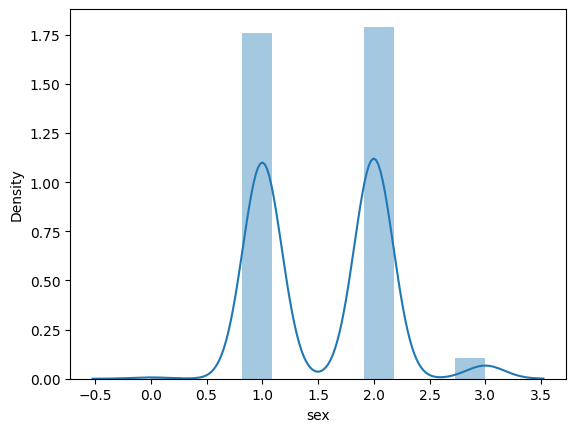

In [29]:
sns.distplot(df.sex)

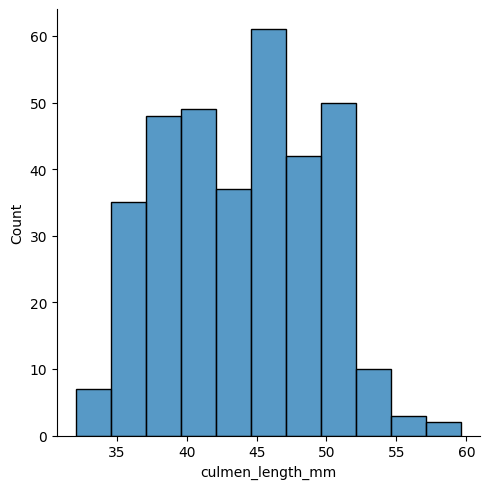

In [30]:
sns.displot(df.culmen_length_mm)

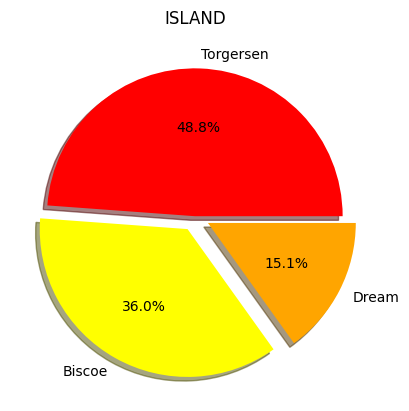

In [34]:
plt.pie(df.island.value_counts(),[0,0.1,0.1],labels = ['Torgersen','Biscoe','Dream'],autopct ='%1.1f%%',shadow = True,colors = ['red','yellow','orange'],)
plt.title('ISLAND')
plt.show()


<Axes: ylabel='sex'>

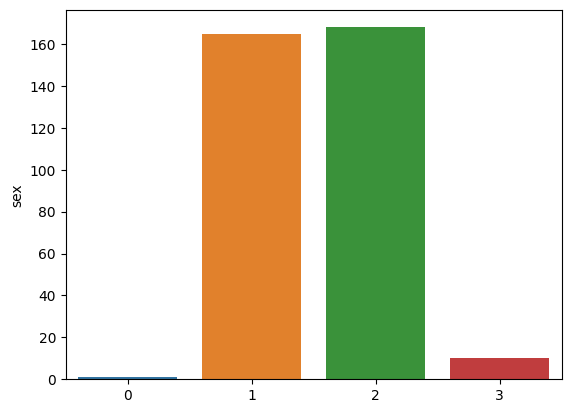

In [35]:
sns.barplot(x =df.sex.value_counts().index,y =df.sex.value_counts() )


#BIVARIATE ANALYSIS

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

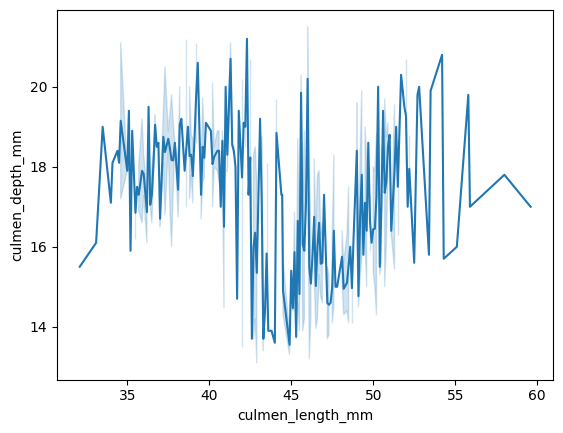

In [36]:
sns.lineplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

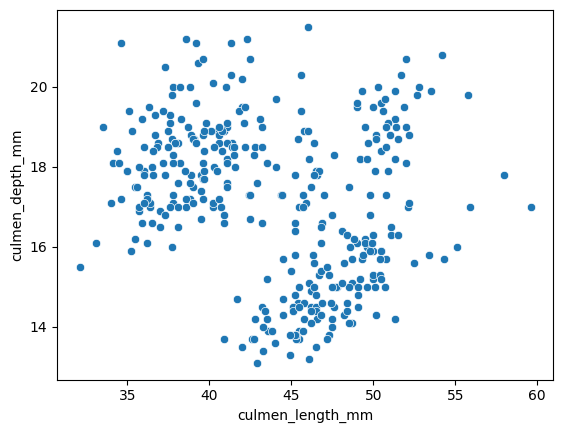

In [37]:
sns.scatterplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)

#MULTIVARIATE ANALYSIS

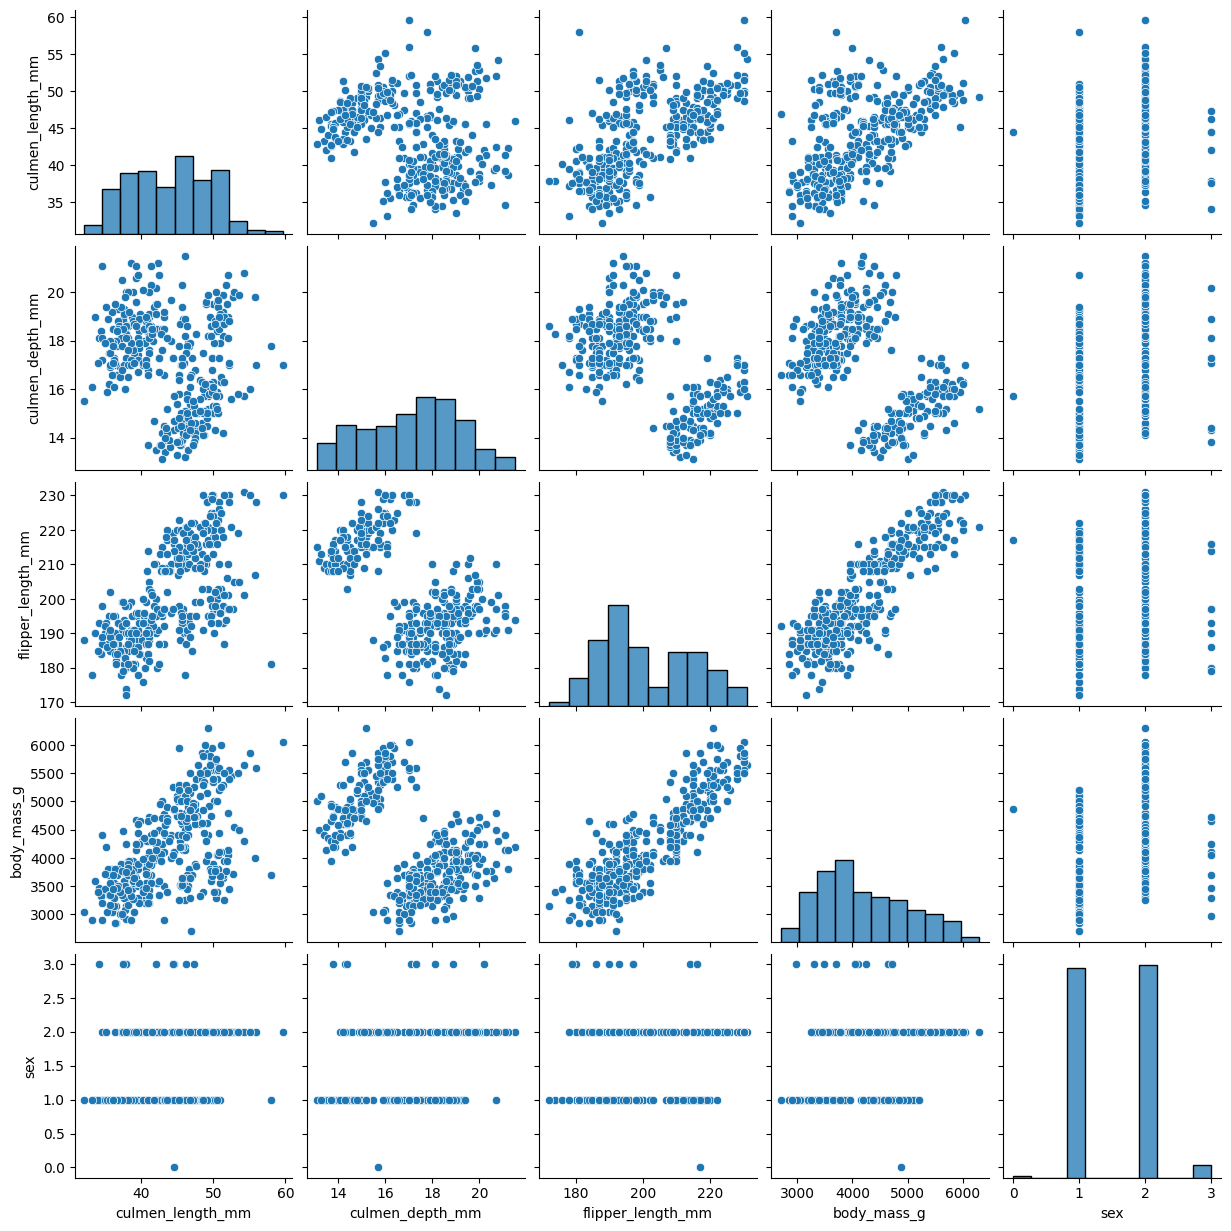

In [38]:
sns.pairplot(df)

<ipython-input-39-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

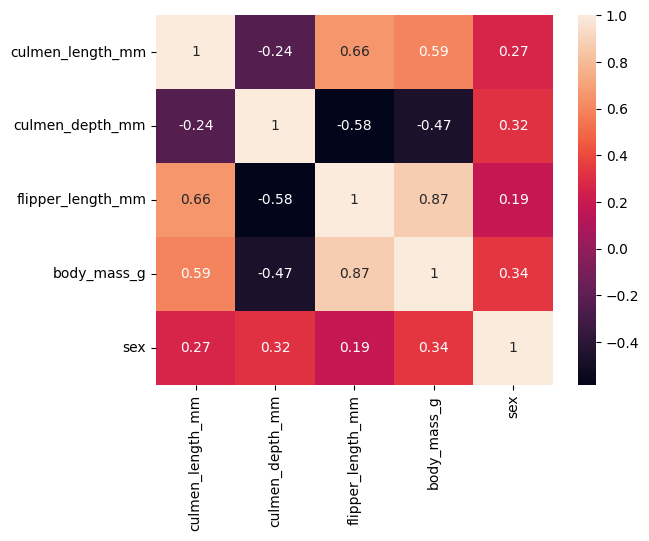

In [39]:
sns.heatmap(df.corr(),annot=True)

#***4. Perform descriptive statistics on the dataset.***

In [91]:
df.describe()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.662791,43.925000,17.152035,200.892442,4200.872093,0.918605
std,0.893320,0.726194,5.443792,1.969060,14.023826,799.696532,0.893320
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,2.000000,1.000000,48.500000,18.700000,213.000000,4750.000000,2.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,2.000000


#***5. Check for Missing values and deal with them.***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

##REPLACING NUMERICAL NULL VALUES

In [ ]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace =True)

In [ ]:
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace =True)

In [ ]:
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace =True)

In [ ]:
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace =True)

#REPLACING CATOGERICAL NULL VALUES


***#8. Check for Categorical columns and perform encoding.***

In [51]:
df['sex'].fillna(df['sex'].mode(),inplace =True)

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
df.sex = le.fit_transform(df.sex)

In [55]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,1
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,3
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,1


#***6.Find the outliers and replace them outliers***

<Axes: >

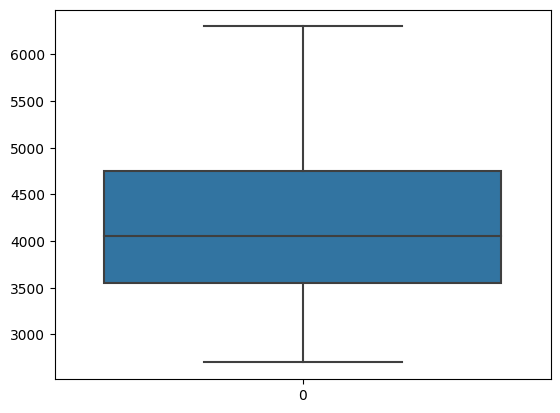

In [42]:
sns.boxplot(df.body_mass_g)
#there are no outliers

#***7.Check the correlation of independent variables with the target***

In [79]:
df_main = pd.get_dummies(df,columns =['sex'])
df_main.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_0,sex_1,sex_2
0,0,2,39.10,18.7,181.0,3750.0,1,0,0
1,0,2,39.50,17.4,186.0,3800.0,1,0,0
2,0,2,40.30,18.0,195.0,3250.0,1,0,0
3,0,2,44.45,17.3,197.0,4050.0,1,0,0
4,0,2,36.70,19.3,193.0,3450.0,1,0,0


In [80]:
df_main.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_0,sex_1,sex_2
species,1.000000,-0.635659,0.728706,-0.741282,0.850819,0.747547,-0.916273,0.045292,0.910142
island,-0.635659,1.000000,-0.351189,0.567701,-0.562957,-0.558500,0.478341,0.230823,-0.686207
culmen_length_mm,0.728706,-0.351189,1.000000,-0.235000,0.655858,0.594925,-0.834188,0.448237,0.491020
culmen_depth_mm,-0.741282,0.567701,-0.235000,1.000000,-0.583832,-0.471942,0.537348,0.320245,-0.821409
flipper_length_mm,0.850819,-0.562957,0.655858,-0.583832,1.000000,0.871221,-0.692089,-0.179672,0.864862
body_mass_g,0.747547,-0.558500,0.594925,-0.471942,0.871221,1.000000,-0.554792,-0.290772,0.815005
sex_0,-0.916273,0.478341,-0.834188,0.537348,-0.692089,-0.554792,1.000000,-0.441643,-0.667991
sex_1,0.045292,0.230823,0.448237,0.320245,-0.179672,-0.290772,-0.441643,1.000000,-0.372649
sex_2,0.910142,-0.686207,0.491020,-0.821409,0.864862,0.815005,-0.667991,-0.372649,1.000000


# ***8. Check for Categorical columns and perform encoding.***

In [71]:
df.species = le.fit_transform(df.species)

In [72]:
df.island = le.fit_transform(df.island)

In [78]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,0
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,0
4,0,2,36.70,19.3,193.0,3450.0,0


# ***9. Split the data into dependent and independent variables.***


In [83]:
y = df_main['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [82]:
X =df_main.drop(columns =['species'],axis =1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_0,sex_1,sex_2
0,2,39.10,18.7,181.0,3750.0,1,0,0
1,2,39.50,17.4,186.0,3800.0,1,0,0
2,2,40.30,18.0,195.0,3250.0,1,0,0
3,2,44.45,17.3,197.0,4050.0,1,0,0
4,2,36.70,19.3,193.0,3450.0,1,0,0


# ***10. Scaling the data***


In [84]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [85]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_0,sex_1,sex_2
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0,0.0,0.0
1,1.0,0.269091,0.511905,0.237288,0.305556,1.0,0.0,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,1.0,0.0,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0,0.0,0.0
4,1.0,0.167273,0.738095,0.355932,0.208333,1.0,0.0,0.0


# ***11. Split the data into training and testing***


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

# ***12.check the training and testing data shape.***

In [87]:
X_train.shape


(240, 8)

In [88]:
X_test.shape

(104, 8)

In [89]:
y_train.shape

(240,)

In [90]:
y_test.shape

(104,)